In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
jrep_df = pd.read_csv('../output_HCMUT/JREP_results.csv')
jrep_df = jrep_df.head(100)
jrep_df

,RMSE,MAE,MSE,R2,Inference Time
0,28972.855100,12180.466134,8.394263e+08,0.936132,0.000288
1,27485.416660,11438.580457,7.554481e+08,0.942522,0.000232
2,29685.487707,11805.103632,8.812282e+08,0.932952,0.000234
3,31905.445419,12789.587012,1.017957e+09,0.922549,0.000282
4,28756.404285,10948.398799,8.269308e+08,0.937083,0.000245
...,...,...,...,...,...
95,36899.039239,12723.605319,1.361539e+09,0.896408,0.000230
96,30060.934941,13504.031516,9.036598e+08,0.931245,0.000231
97,27207.468795,11879.486863,7.402464e+08,0.943678,0.000235
98,30372.722674,12084.791377,9.225023e+08,0.929812,0.000250


In [25]:
hdem_df = pd.read_csv('../output_HCMUT/HDEM_results.csv')
hdem_df

,RMSE,MAE,R2,Inference Time
0,28505.711078,11204.946284,0.953695,0.000938
1,29752.251707,10753.355678,0.949557,0.000821
2,29227.624553,10439.526831,0.951320,0.000846
3,31301.021397,11321.053394,0.944168,0.000826
4,29983.858320,10615.366924,0.948768,0.000830
...,...,...,...,...
95,29705.198110,10458.550006,0.949716,0.000806
96,28592.147258,10462.562043,0.953414,0.000895
97,29465.745650,11121.726196,0.950524,0.000899
98,29753.031233,10528.621607,0.949554,0.000910


In [26]:
pc_df = pd.read_csv('../output_HCMUT/pc_transformer_results.csv')
pc_df = pc_df.head(100)
pc_df

,RMSE,MAE,MSE,R2,Inference Time
0,92791.569887,55345.076617,8.610275e+09,0.448073,0.000033
1,69672.504023,38492.007758,4.854258e+09,0.688838,0.000039
2,72080.038150,33974.770466,5.195532e+09,0.666962,0.000031
3,99763.576692,54208.355444,9.952771e+09,0.362018,0.000020
4,69820.347491,36997.958641,4.874881e+09,0.687516,0.000024
...,...,...,...,...,...
95,83311.981746,48127.170032,6.940886e+09,0.555083,0.000050
96,74665.545847,42215.164016,5.574944e+09,0.642641,0.000057
97,83682.429487,46612.890446,7.002749e+09,0.551117,0.000041
98,81402.212821,47711.154229,6.626320e+09,0.575247,0.000056


In [27]:
# Box plot of all columns in JREP results
def box_plot_metrics(df, name):
    # Chọn các cột số
    cols = df.select_dtypes(include='number').columns
    n_cols = len(cols)

    # Tạo subplot với 1 hàng, n_cols cột (mỗi cột một boxplot)
    fig, axes = plt.subplots(1, n_cols, figsize=(4 * n_cols, 6), sharey=False)

    # Nếu chỉ có 1 cột, axes sẽ không phải list
    if n_cols == 1:
        axes = [axes]

    # Vẽ từng boxplot theo chiều dọc
    for ax, col in zip(axes, cols):
        sns.boxplot(y=df[col], ax=ax)
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('')

    plt.tight_layout()
    plt.suptitle(f'Boxplots of {name} Results', fontsize=16, y=1.05)  # Thêm tiêu đề chung
    plt.show()

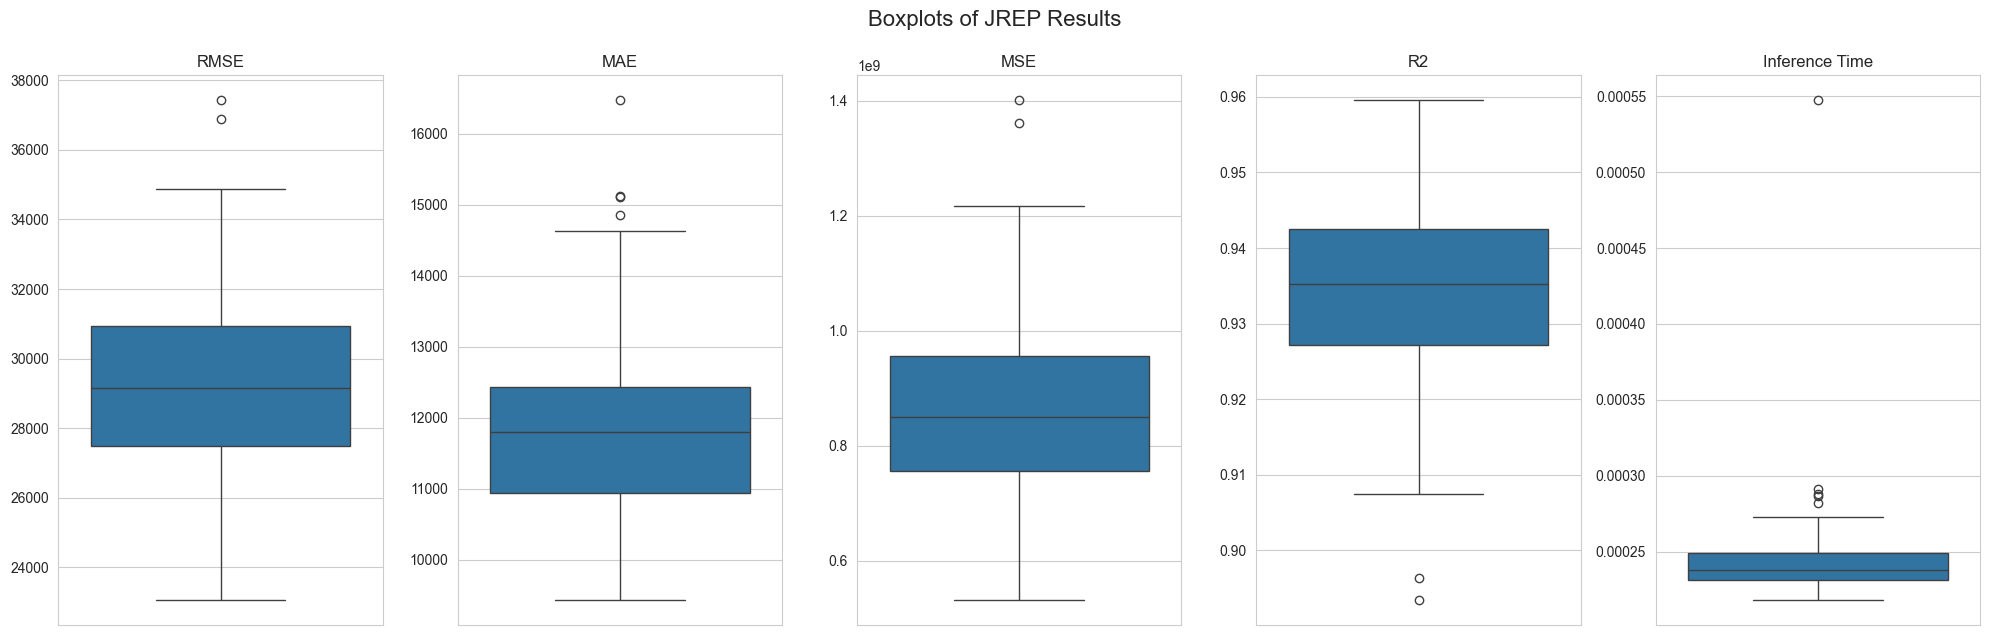

In [28]:
box_plot_metrics(jrep_df, 'JREP')

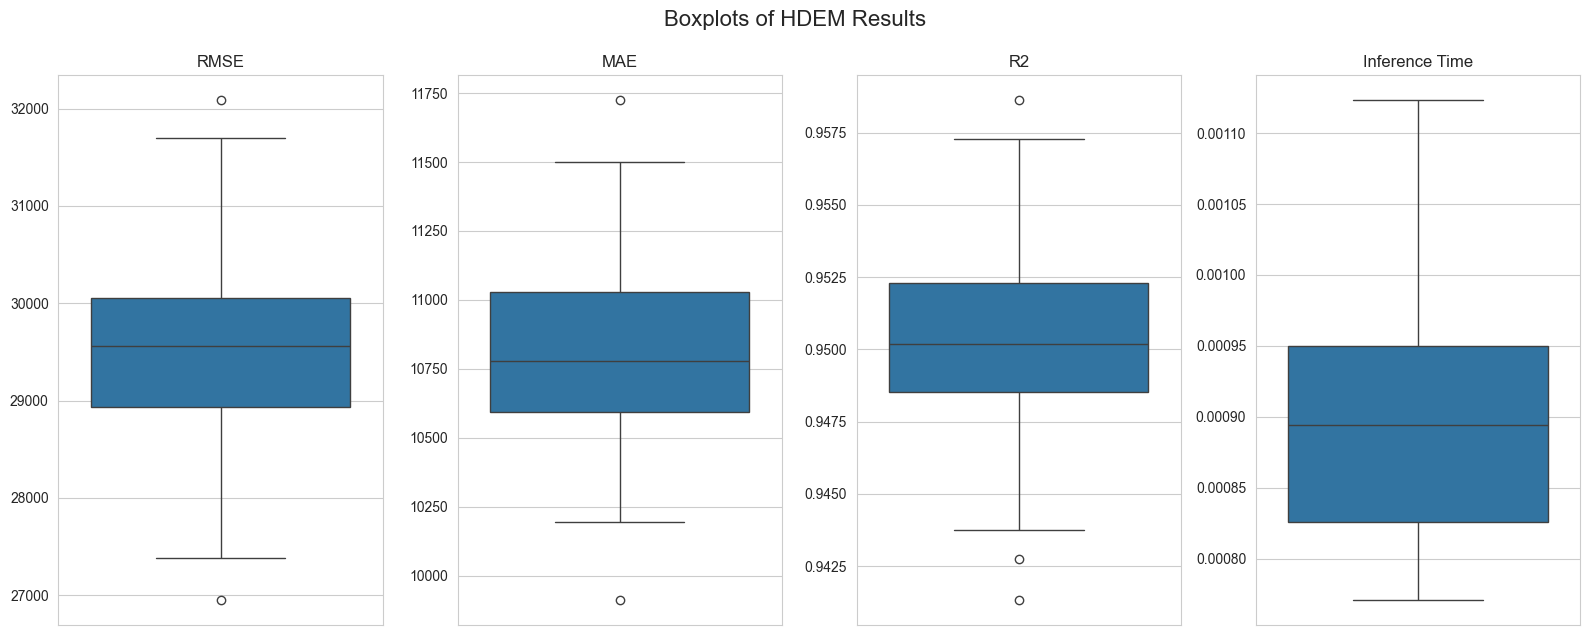

In [29]:
box_plot_metrics(hdem_df, 'HDEM')

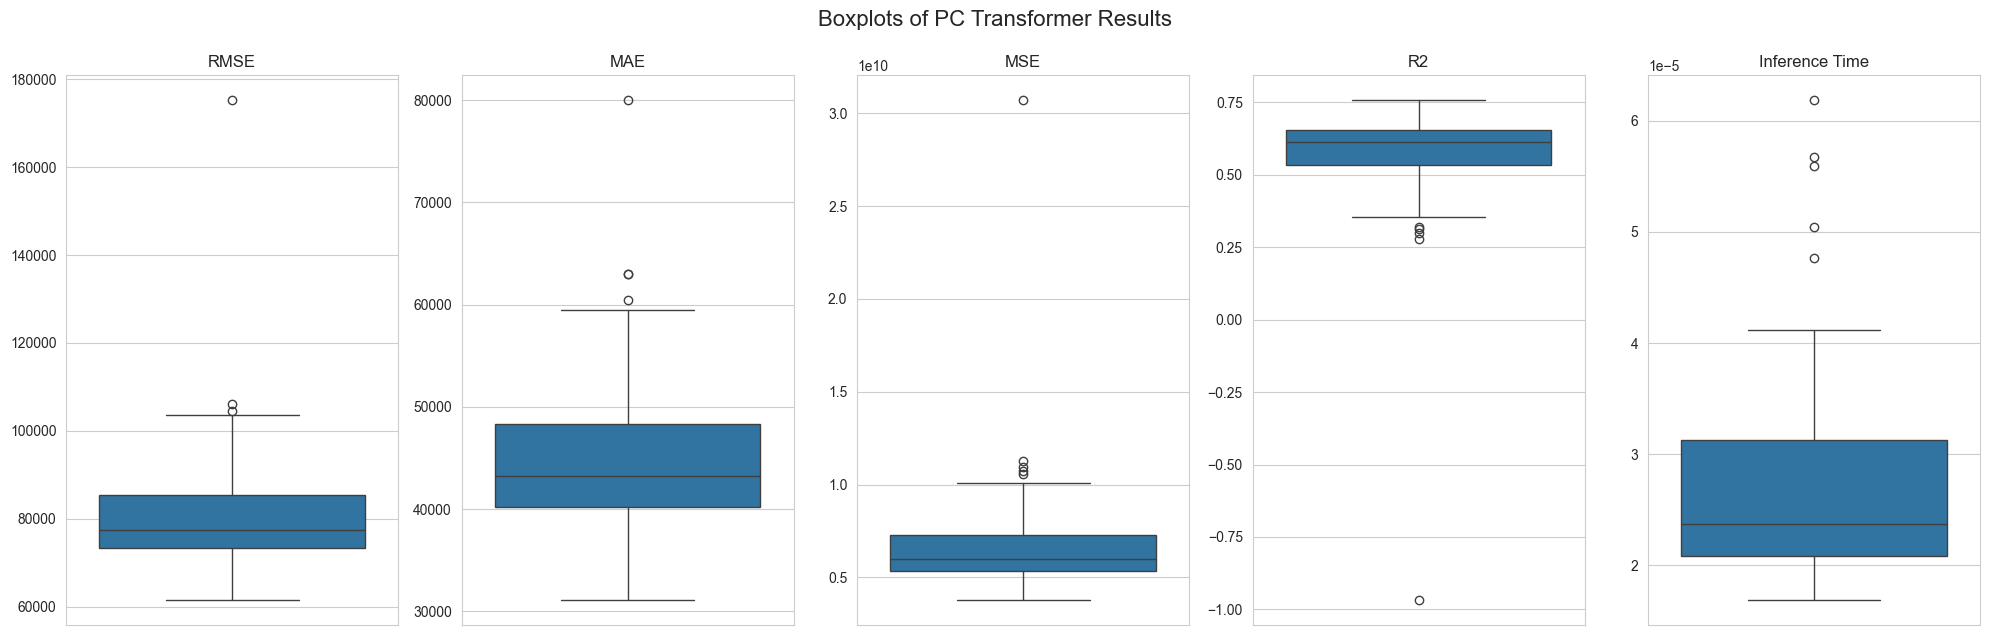

In [30]:
box_plot_metrics(pc_df, 'PC Transformer')

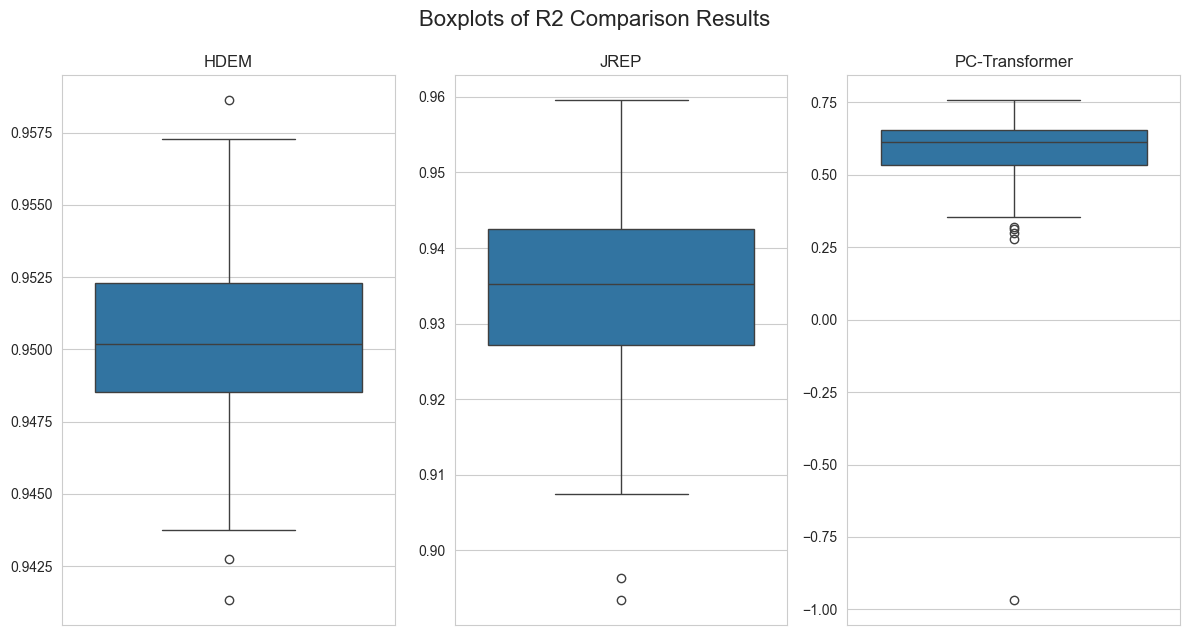

In [32]:
# Box plot of R2 all df
data = {
    'HDEM': hdem_df['R2'],
    'JREP': jrep_df['R2'],
    'PC-Transformer': pc_df['R2']
}

# Tạo DataFrame gộp để vẽ box plot
plot_data = pd.DataFrame(data)

box_plot_metrics(plot_data, 'R2 Comparison')